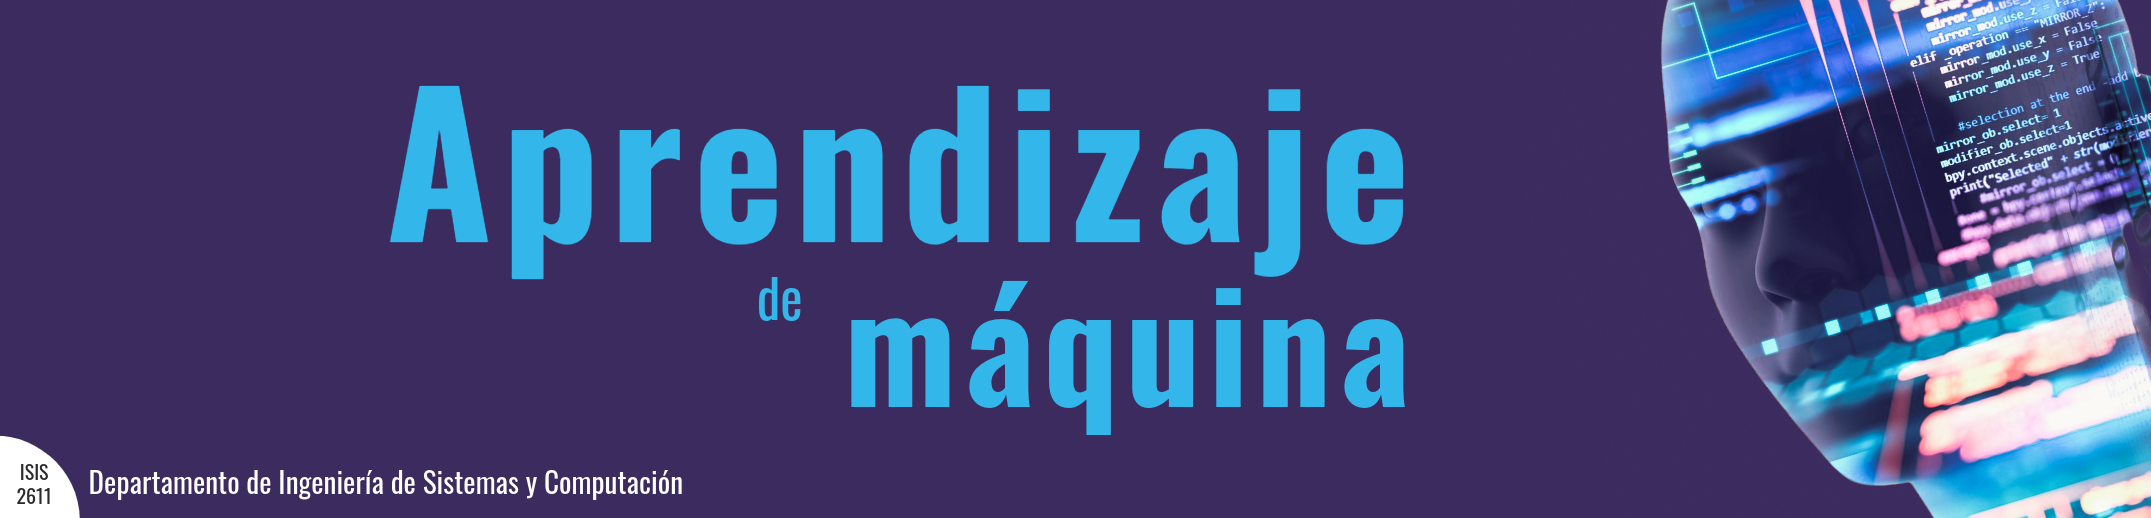

## Ambiente para el desarrollo del laboratorio: datos y librerías

In [ ]:
import os
if not os.path.exists('data'):
    os.makedirs('data')
    # Download DiccPacientes.xlsx
    !wget -P data/ https://raw.githubusercontent.com/ISIS-2611-AprendizajeMaquina/MaterialDeClase-ISIS-2611/main/Laboratorios/L1%20Regresion%20Lineal/data/DiccPacientes.xlsx
    # Download Datos Lab 1.csv
    !wget -P data/ https://raw.githubusercontent.com/ISIS-2611-AprendizajeMaquina/MaterialDeClase-ISIS-2611/main/Laboratorios/L1%20Regresion%20Lineal/data/Datos%20Lab%201.csv
    # Download Datos Test Lab 1.csv
    !wget -P data/ https://raw.githubusercontent.com/ISIS-2611-AprendizajeMaquina/MaterialDeClase-ISIS-2611/main/Laboratorios/L1%20Regresion%20Lineal/data/Datos%20Test%20Lab%201.csv
else:
    print("'data' directory already exists.")

--2026-02-16 13:08:56--  https://raw.githubusercontent.com/ISIS-2611-AprendizajeMaquina/MaterialDeClase-ISIS-2611/main/Laboratorios/L1%20Regresion%20Lineal/data/DiccPacientes.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10221 (10.0K) [application/octet-stream]
Saving to: ‘data/DiccPacientes.xlsx’

DiccPacientes.xlsx  100%[===================>]   9.98K  --.-KB/s    in 0s      

2026-02-16 13:08:56 (21.0 MB/s) - ‘data/DiccPacientes.xlsx’ saved [10221/10221]

--2026-02-16 13:08:56--  https://raw.githubusercontent.com/ISIS-2611-AprendizajeMaquina/MaterialDeClase-ISIS-2611/main/Laboratorios/L1%20Regresion%20Lineal/data/Datos%20Lab%201.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

# 1. Exploración de datos

In [ ]:
# Queremos empezar a mirar los tipos de datos que hay
datos_pacientes = pd.read_csv("data/Datos Lab 1.csv")
data = datos_pacientes.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

In [ ]:
# Veamos el porcentaje de valores nulos por cada columna
((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)

,0
Diastolic BP,0.051861
HDL (mg/dL),0.050031
Waist-to-Height Ratio,0.046370
Weight (kg),0.044539
Total Cholesterol (mg/dL),0.041489
Age,0.041489
Height (cm),0.041489
Height (m),0.037218
Abdominal Circumference (cm),0.037218
Systolic BP,0.037218


De acuerdo con el diccionario de datos: la columna "Blood Pressure" está en un formato que permite obtener la presión SYS y la presión DIA. Ya que no hay nulos en la columna de Blood Pressure se puede recuperar facilmente los valores nulos de estas dos columnas. Ahora veamos la distribución de valores de los datos cuantitativos.

In [ ]:
data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


Se puede observar que hay Riesgos de CVD negativos, colesterol negativo y lipoproteina negativa. Trabajaremos con el supuesto de que estos valores no pueden ser negativos y deben ser corregidos. Ahora veamos la distribución de valores de los datos cualitativos.

In [ ]:
# Veamos cómo se distribuye la clasificación del riesgo de CVD
data["CVD Risk Level"].value_counts(dropna=False)

,count
CVD Risk Level,
HIGH,793
INTERMEDIARY,616
LOW,230


In [ ]:
display(data["Blood Pressure Category"].value_counts(dropna=False))
display(data["Family History of CVD"].value_counts(dropna=False))
display(data["Smoking Status"].value_counts(dropna=False))
display(data["Diabetes Status"].value_counts(dropna=False))
display(data["Blood Pressure (mmHg)"].sample(5))
display(data["Sex"].value_counts(dropna=False))
display(data["Physical Activity Level"].value_counts(dropna=False))

,count
Blood Pressure Category,
Hypertension Stage 2,680
Hypertension Stage 1,527
Normal,321
Elevated,111


,count
Family History of CVD,
N,820
Y,819


,count
Smoking Status,
Y,850
N,789


,count
Diabetes Status,
N,821
Y,818


,Blood Pressure (mmHg)
220,104/70
652,91/66
198,167/90
1632,94/68
910,156/118


,count
Sex,
M,821
F,818


,count
Physical Activity Level,
High,582
Moderate,537
Low,520


Observamos que hay completitud en los datos cualitativos, hay consistencia y también hay validez.

# 2. Preparación de datos



In [ ]:
# Se quiere empezar por elminar registros completamente duplicados
# Antes de dividir los datos de entrenamiento de los datos de validación se desea tratar los duplicados
print("Había un total de {} registros completamente duplicados!".format(data.duplicated(keep = False).sum()))
data = data.drop_duplicates()

Había un total de 302 registros completamente duplicados!


Se eliminan los registros duplicados debido a que no son fiables para la validación del modelo. Debido a que pueden provocar falsas buenas métricas al colocar un registro en el conjunto de entrenamiento y su duplicado en el conjunto de validación.

In [ ]:
# Luego dejemos un único formato de fechas
def parse_date_mixed(x):
    if pd.isna(x):
        return pd.NaT
    x = str(x).strip()
    if "/" in x:
        return pd.to_datetime(x, errors="coerce", dayfirst=True)
    return pd.to_datetime(x, errors="coerce")

In [ ]:
# Comprobemos ids duplicados
print(f"Hay {data['Patient ID'].isnull().sum()} registros sin id del paciente")
dup_counts = (data['Patient ID'].value_counts()
                        .loc[lambda s: s > 1]
                        .sort_values(ascending=False))
i = 1
print("5 Ejemplos de ids repetidos:")
for id_, n in dup_counts.items():
    print(f"{id_} → {n} apariciones")
    if i == 5:
      break
    i+=1

Hay 0 registros sin id del paciente
5 Ejemplos de ids repetidos:
Lclg1001 → 2 apariciones
HNwp6592 → 2 apariciones
LQri5564 → 2 apariciones
yAsk5000 → 2 apariciones
MJZU2601 → 2 apariciones


In [ ]:
# Ahora sería útil revisar las entradas con IDs duplicados y fechas de servicio iguales
dup_id = data[data.duplicated(subset=['Patient ID','Date of Service'],keep=False)].sort_values(ascending=[False], by=["Patient ID"])
dup_idcvd = data[data.duplicated(subset=['Patient ID','Date of Service','CVD Risk Score'],keep=False)].sort_values(ascending=[False], by=["Patient ID"])
display(dup_id)
print(f"La proporción de registros duplicados(mismo paciente el mismo dia) por el total de registros es {round(dup_id.shape[0]/data.shape[0],2)*100}%")
print(f"La proporción de registros duplicados(mismo paciente el mismo dia con el mismo CVD score) por el total de registros es de {dup_idcvd.shape[0]/data.shape[0]}%")

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
727,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,41.813,HIGH
956,zhZi8857,"December 05, 2025",F,36.0,81.200,1.750,26.500,74.000,141/76,225.0,...,Moderate,Y,175.000,0.423,141.0,NaN,Hypertension Stage 2,164.0,16.850,HIGH
197,zZle5455,13 Apr 22,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,17.736,HIGH
1452,zZle5455,13 Apr 22,M,53.0,108.159,1.925,24.081,NaN,162/94,141.0,...,Moderate,N,NaN,0.411,162.0,94.0,Hypertension Stage 2,63.0,19.523,HIGH
512,yAsk5000,01-09-2023,F,59.0,89.400,1.670,32.100,107.200,118/89,206.0,...,Low,Y,167.000,0.642,118.0,89.0,Hypertension Stage 1,122.0,18.440,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.100,116/93,171.0,...,Moderate,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW
1117,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,23.430,HIGH
383,Axab9332,2021-12-11,F,58.0,69.870,1.944,20.785,86.259,162/106,151.0,...,Moderate,N,194.450,0.444,162.0,106.0,Hypertension Stage 2,44.0,15.277,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.0,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH


La proporción de registros duplicados(mismo paciente el mismo dia) por el total de registros es 15.0%
La proporción de registros duplicados(mismo paciente el mismo dia con el mismo CVD score) por el total de registros es de 0.0%


Podemos llegar a la conclusión de que los pacientes con dos registros en una misma fecha tienen dos distintos puntajes de riesgo CVD. Lo cual es problematico porque significa que para exactamente los mismos valores de variables independientes hay dos posibles valores de la variable a estimar. Eliminar estos registros duplicados no puede ser una opción debido a que constituyen el 15% del porcentaje de datos(un porcentaje alto como para eliminar los registros).

De esta forma decidimos promediar el puntaje del CVD para dos registros duplicados. Sin embargo antes de promediar hacemos valor absoluto a los valores que eran negativos. Solucionamos esto aplicando valor absoluto a los CVD Risk Scores, Total Cholesterol (mg/dL) y Estimated LDL (mg/dL).

In [ ]:
data["CVD Risk Score"] = abs(data["CVD Risk Score"])
data["Total Cholesterol (mg/dL)"] = abs(data["Total Cholesterol (mg/dL)"])
data["Estimated LDL (mg/dL)"] = abs(data["Estimated LDL (mg/dL)"])
print("Datos totales: {}".format(data.shape[0]))
data.describe()

Datos totales: 1488


,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1427.000000,1421.000000,1434.000000,1440.000000,1436.000000,1426.000000,1415.000000,1439.000000,1427.000000,1420.000000,1432.000000,1416.000000,1437.000000,1460.000000
mean,46.970844,85.740577,1.757225,28.467813,91.700031,198.387420,56.117225,117.381705,175.730274,0.523449,125.619624,82.910302,113.353829,18.387734
std,13.019434,21.665153,0.117950,7.327327,13.435167,59.222219,16.716022,32.157575,11.707143,0.085414,22.669652,15.540357,60.001551,10.583007
min,6.134000,13.261000,1.371000,4.317000,49.542000,1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,1.000000,0.883000
25%,37.000000,67.057000,1.665250,22.600000,80.000000,150.000000,42.000000,92.000000,166.992000,0.455000,108.000000,71.000000,63.000000,15.156000
50%,46.000000,86.405000,1.760000,28.040500,91.300000,198.000000,56.000000,115.000000,176.000000,0.519500,125.000000,82.000000,111.000000,16.970000
75%,55.000000,104.748000,1.850000,34.002250,102.376750,249.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.941250
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


In [ ]:
data['CVD Risk Score'] = data.groupby(['Patient ID','Date of Service'])['CVD Risk Score'].transform('mean')
data = data.drop_duplicates(subset=['Patient ID','Date of Service'])
dup_id = data[data.duplicated(subset=['Patient ID','Date of Service'],keep=False)].sort_values(ascending=[False], by=["Patient ID"])
print(f"La proporción de registros duplicados(mismo paciente el mismo dia) por el total de registros es {round(dup_id.shape[0]/data.shape[0],2)*100}%")
print("Así podemos concluir que los datos ya cumplen la calidad en la dimensión de unicidad")
# Finalmente eliminemos los registros que no tienen un valor del CVD ya que son menos del 1.9% de los datos
data = data.dropna(subset = ['CVD Risk Score'])

La proporción de registros duplicados(mismo paciente el mismo dia) por el total de registros es 0.0%
Así podemos concluir que los datos ya cumplen la calidad en la dimensión de unicidad


Ahora antes de solucionar los problemas de completitud separamos los datos de entrenamiento de los datos de validación de acuerdo con el lo sugerido: utilizar un valor de semilla de 42 (ramdon_state) y un porcentaje de 25% para el tamaño del conjunto de prueba. Hacer esta separación es importante para evitar el filtrado de datos (data leakage) .

In [ ]:
X = data.drop(columns=["CVD Risk Score"])
y = data["CVD Risk Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Empecemos con las variables numéricas:
from math import floor
# Definimos las columnas que no tendremos en cuenta para la predicción del CVD Risk Score y removemos Blood Pressure
cols_to_drop1 = ["Patient ID", "Date of Service", "Blood Pressure (mmHg)", "Height (cm)"]

def drop_columns1(df):
    return df.drop(columns=cols_to_drop1, errors="ignore")

dropper = FunctionTransformer(drop_columns1)

def floor_age(df):
  df = df.copy()
  df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
  df["Age"] = df["Age"].apply(lambda x: floor(x) if pd.notna(x) else x)
  return df

convert_age = FunctionTransformer(floor_age)

def sys_dia_blood(df):
  df = df.copy()
  bp = df["Blood Pressure (mmHg)"].astype(str).str.strip()
  bp_ex = bp.str.extract(r"(?P<sys>\d+)\s*/\s*(?P<dia>\d+)")
  df["Systolic BP"] = pd.to_numeric(bp_ex["sys"], errors="coerce")
  df["Diastolic BP"] = pd.to_numeric(bp_ex["dia"], errors="coerce")
  return df

impute_sys_dia = FunctionTransformer(sys_dia_blood)

def fill_physical_measures(df):
  df = df.copy()
  # Heights
  df["Height (m)"] = df["Height (m)"].fillna(df["Height (cm)"] / 100)

  # Weights
  mask = df["Weight (kg)"].isna() & df["BMI"].notna() & df["Height (m)"].notna()
  df.loc[mask, "Weight (kg)"] = df.loc[mask, "BMI"] * (df.loc[mask, "Height (m)"] ** 2)

  # BMI
  mask = df["BMI"].isna() & df["Weight (kg)"].notna() & df["Height (m)"].notna()
  df.loc[mask, "BMI"] = df.loc[mask, "Weight (kg)"] / (df.loc[mask, "Height (m)"] ** 2)

  # Abdominal Circumference
  mask = df["Abdominal Circumference (cm)"].isna() & df["Waist-to-Height Ratio"].notna() & df["Height (m)"].notna()
  df.loc[mask, "Abdominal Circumference (cm)"] = df.loc[mask, "Waist-to-Height Ratio"] * df.loc[mask, "Height (m)"] * 100

  # Waist-to-Height Ratio
  mask = df["Waist-to-Height Ratio"].isna() & df["Abdominal Circumference (cm)"].notna() & df["Height (m)"].notna()
  df.loc[mask, "Waist-to-Height Ratio"] = df.loc[mask, "Abdominal Circumference (cm)"] / (df.loc[mask, "Height (m)"] * 100)
  return df

fill_measures = FunctionTransformer(fill_physical_measures)

# Transformadores Cuantitativos:

El primer transofmrador descarta las columnas que no tiene impacto en el cálculo del riesgo de CVD, como el identificador del paciente o la fecha de servicio, pues no contienen información que pueda predecir un riesgo de salud, además de quitar la altura en centímetros para no repetir información con la medida en metros y evitar redundancias. También elimina la columna original de presión arterial ya que, al venir como una cadena de texto, no permite realizar operaciones matemáticas directamente.

Otro transformador aplica un ajuste a la edad usando la función suelo para quedar solo con los años cumplidos, lo que permite que el dato sea más uniforme y se ajuste a la forma en que normalmente se reporta la edad en contextos clínicos.

El siguiente transformador procesa la presión arterial, donde se extrajo y se separó los valores de sístole y diástole que venían juntos en un solo campo de texto, convirtiéndolos en dos variables numéricas independientes que el modelo sí puede interpretar.

El último transformador implementa una lógica para rellenar los valores faltantes en las medidas físicas aprovechando que variables como el peso, la altura y el índice de masa corporal están relacionadas matemáticamente entre sí; por ejemplo, si faltaba el peso pero está el índice de masa corporal y la altura, se puede calcular mediante su fórmula respectiva, haciendo lo mismo para la circunferencia abdominal y la relación cintura-estatura, lo que permite que la información de cada paciente sea coherente y que no se pierdan registros valiosos.

In [ ]:
# Ahora vamos con las variables categóricas:
def convert_binary_to_numeric(df):
    df = df.copy()
    binary_cols = ["Smoking Status", "Diabetes Status", "Family History of CVD", "Sex"]

    for col in binary_cols:
        df[col] = df[col].map({"Y": 1, "N": 0, "YES": 1, "NO": 0, "F": 1, "M": 0})
    return df

binary_converter = FunctionTransformer(convert_binary_to_numeric)

def convert_ordinal(df):
    df = df.copy()
    df["Blood Pressure Category"] = df['Blood Pressure Category'].map({"Normal": 1, "Elevated": 2, "Hypertension Stage 1": 3, "Hypertension Stage 2": 4})
    df["Physical Activity Level"] = df["Physical Activity Level"].map({"High": 3 , "Moderate": 2, "Low": 1})
    if "CVD Risk Level" in df.columns:
      df["CVD Risk Level"] = df["CVD Risk Level"].map({"HIGH": 3 , "INTERMEDIARY": 2, "LOW": 1})
    return df

ordinal_converter = FunctionTransformer(convert_ordinal)

# Transformadores Cualitativos:

El primer transformador de variables categóricas se encarga de convertir los atributos binarios en valores de cero y uno para que el modelo de regresión pueda interpretarlos, estandarizando de paso las diferentes formas en que se registraron las respuestas de sí o no y el género de los pacientes(0 para hombres y 1 para mujeres). El segundo transformador se enfoca en las variables de tipo ordinal, donde se asigna una escala numérica específica a categorías que tienen un orden lógico predefinido, como sucede con los niveles de actividad física o las etapas de la presión arterial. Al realizar esta asignación numérica, se garantiza que el modelo reconozca la jerarquía y la intensidad de estos factores de riesgo, transformando etiquetas de texto en una secuencia matemática que preserva el sentido clínico de la progresión de cada variable

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

numeric_features = ['Height (m)','Weight (kg)','BMI',"Abdominal Circumference (cm)", "Waist-to-Height Ratio", 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)',
                    'Systolic BP', 'Diastolic BP','Age']
categorical_features = ['Diabetes Status', 'Smoking Status', 'Family History of CVD',"Blood Pressure Category","Physical Activity Level", "Sex", "CVD Risk Level"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
pipeline_regresion = Pipeline(steps=[
    ("convert_age", convert_age),
    ("impute_sys_dia", impute_sys_dia),
    ("fill_measures", fill_measures),
    ("binary_converter", binary_converter),
    ("ordinal_converter", ordinal_converter),
    ("dropper", dropper),
    ("preprocesamiento", preprocessor),
])

In [ ]:
from sklearn import set_config
set_config(display="diagram")
pipeline_regresion

Pipeline(steps=[('convert_age',
                 FunctionTransformer(func=<function floor_age at 0x7a5f3335a7a0>)),
                ('impute_sys_dia',
                 FunctionTransformer(func=<function sys_dia_blood at 0x7a5f33359e40>)),
                ('fill_measures',
                 FunctionTransformer(func=<function fill_physical_measures at 0x7a5f333844a0>)),
                ('binary_converter',
                 FunctionTransformer(func=<function convert_binary_to_numeri...
                                                  ['Height (m)', 'Weight (kg)',
                                                   'BMI',
                                                   'Abdominal Circumference '
                                                   '(cm)',
                                                   'Waist-to-Height Ratio',
                                                   'HDL (mg/dL)',
                                                   'Fasting Blood Sugar '
                                                   '(mg/dL)',
                                                   'Systolic BP',
                                                   'Diastolic BP', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Diabetes Status',
                                                   'Smoking Status',
                                                   'Family History of CVD',
                                                   'Blood Pressure Category',
                                                   'Physical Activity Level',
                                                   'Sex',
                                                   'CVD Risk Level'])]))])

# Pipeline

El proceso inicia con la ejecución de los transformadores personalizados de limpieza, donde primero se estandariza la edad, se extraen los componentes numéricos de la presión arterial y se recuperan las medidas físicas faltantes mediante los cálculos matemáticos derivados. Inmediatamente después, se ejecutan las funciones de conversión cualitativa para transformar las etiquetas de texto en valores binarios y escalas ordinales, cerrando esta fase inicial con la eliminación de las columnas redundantes o de identificación mediante el transformador de descarte.

Una vez que el conjunto de datos tiene la estructura y el formato deseados, se integra un componente de preprocesamiento que utiliza los SimpleImputers para resolver de manera definitiva cualquier valor faltante que no pudo ser recuperado lógicamente en los pasos previos. Para las características numéricas, se aplica la estrategia de la mediana para evitar el sesgo de valores atípicos, seguida de un escalamiento estándar para normalizar. Por otro lado, para las características categóricas se opta por una imputación basada en la moda o valor más frecuente.

# 3. Construcción de un modelo de regresión lineal

In [ ]:
# Se ejecuta la preparación de los datos para la regresión lineal
Xt_train = pipeline_regresion.fit_transform(X_train)
# Hacemos la regresión
Modelo = LinearRegression()
Modelo.fit(Xt_train,y_train)
y_train_pred = Modelo.predict(Xt_train)

In [ ]:
# Se calculan las métricas sobre el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE  train:", mae_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print("RMSE train:", rmse_train)
r2_train = r2_score(y_train, y_train_pred)
print("R²   train:", r2_train)

MAE  train: 2.9858977409419505
RMSE train: 9.336852221284516
R²   train: 0.0726141096670937


In [ ]:
# Se calculan las métricas sobre el conjunto de validación
Xt_test = pipeline_regresion.transform(X_test)
y_test_pred = Modelo.predict(Xt_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print("MAE  test:", mae_test)
print("RMSE test:", rmse_test)
print("R²   test:", r2_test)

MAE  test: 3.5359868958133336
RMSE test: 12.412672327997878
R²   test: -0.011083281628071484


Se puede concluir que el modelo no obtuvo resultados confiables, pues las métricas muestran que los errores no son explicados por el modelo: R^2 muy pequeño e incluso negativo para el caso de las métricas del conjunto test. Adicionalmente el orden de los errores promedio es de más de 9 unidades para el caso del RMSE, mientras que son de 3 para el caso del MAE.

Por esto, hagamos un segundo modelo con el fin de cumplir los supuestos de la regresión lineal y obtener mejores métricas. Primero empecemos evaluando la relevancia del CVD Risk Level y si este da alguna pista fiable sobre el valor del CVD Risk Score:

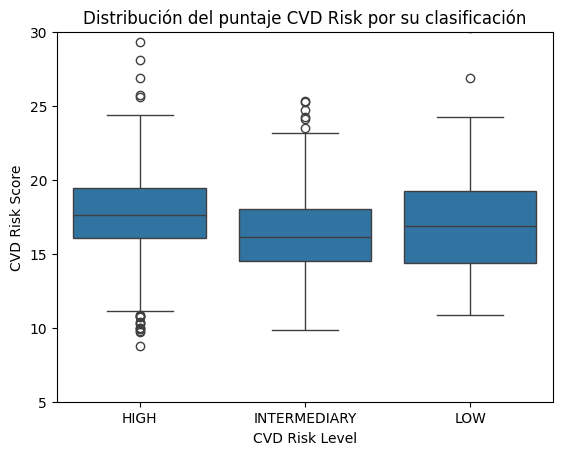

In [ ]:
plt.figure()
sns.boxplot(x=data['CVD Risk Level'],y=data['CVD Risk Score'])
plt.title("Distribución del puntaje CVD Risk por su clasificación")
plt.ylim((5,30))
plt.show()

Podemos concluir que la clasificación del riesgo del CVD es un pésimo predictor del CVD Risk Score, ya que la distribución de puntajes y sus cuartiles no tiene cambios significativos entre distintas clasificaciones. Por este motivo, se desacartará el CVD Risk Score como variable independiente dentro del modelo.

In [ ]:
# Ahora veamos cómo el modelo estimó los coeficientes de cada variable independiente:
feature_names = pipeline_regresion.named_steps["preprocesamiento"].get_feature_names_out()
feature_names = [
    name.replace("num__", "").replace("cat__", "")
    for name in feature_names
]
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": Modelo.coef_
})
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)
coef_df

,Variable,Coeficiente
0,Height (m),-0.901306
1,Weight (kg),-0.457305
2,BMI,1.749924
3,Abdominal Circumference (cm),1.667539
4,Waist-to-Height Ratio,-2.085746
5,HDL (mg/dL),0.140294
6,Fasting Blood Sugar (mg/dL),-0.051851
7,Systolic BP,1.064744
8,Diastolic BP,0.244829
9,Age,-0.215138


De este modelo se podría concluir que dejando todas las demás variables fijas, mientras más altura, menos riesgo de CVD. Pasa lo mismo con el peso, mientras más peso, menos riesgo de CVD (dejando las demás variables fijas). También se llega a la conclusión de que mientras más circunferencia abdonimal más riesgo,  pero mientras más cm de circunferencia abdonminal por cm de altura menos riesgo.

Todas estas incongruencias sugieren la hipotesis de que dentro del modelo de regresión lineal no es útil tener variables absolutas sobre las características físicas del paciente. Resultan más útiles las variables relativas, tales como el BMI o el Waist-to-Height Ratio.

# Linealidad
Una forma de evaluar este supuesto es usar una prueba estadística como el test de Rainbow, que devuelve un estadístico y un p-value para comprobar si el modelo lineal se ajusta bien o si hay indicios de que la relación no es lineal.

In [ ]:
X_sm = sm.add_constant(Xt_train_df)
modelo_sm = sm.OLS(y_train, X_sm).fit()

rainbow_stat, rainbow_pvalue = linear_rainbow(modelo_sm)

print("Estadístico Rainbow:", rainbow_stat)
print("p-value Rainbow    :", rainbow_pvalue)

Estadístico Rainbow: 1.9013734277664658
p-value Rainbow    : 7.245256666555533e-13


Tenemos que el test de Rainbow dio un estadístico $\approx 1.9$ y un $p-value  \approx 7.2 \times 10^{-13}$ . El p-value es menor que el umbral de $0.05$. Según esa información el supuesto no se cumple. Sin embargo, vamos a tratar de mejorar el modelo.

## Comprobación del supuesto de no Multicolinealidad
Recordemos que habrá un valor de VIF por cada una de las variables predictoras que, por ejemplo, se puede interpretar de la siguiente forma:

  $VIF > 4:$ Se tiene problema de Multicolinealidad

  $VIF <=4 $: No hay problema de Multicolinealidad


In [ ]:
feature_names = pipeline_regresion.named_steps["preprocesamiento"].get_feature_names_out()
Xt_train_df = pd.DataFrame(
    Xt_train.toarray() if hasattr(Xt_train, "toarray") else Xt_train,
    columns=feature_names,
    index=X_train.index
)
X_vif = Xt_train_df.select_dtypes(include="number").copy()
clean_columns = (
    X_vif.columns
         .str.replace("^num__", "", regex=True)
         .str.replace("^cat__", "", regex=True)
)
vif_values = []
with np.errstate(divide="ignore", invalid="ignore"):
    for i in range(X_vif.shape[1]):
        vif = variance_inflation_factor(X_vif.values, i)
        vif_values.append(vif)

vif_data = pd.DataFrame({
    "Variable": clean_columns,
    "VIF": vif_values
})
print(vif_data)

                        Variable        VIF
0                     Height (m)   1.975828
1                    Weight (kg)   1.618779
2                            BMI   1.675191
3   Abdominal Circumference (cm)   5.814430
4          Waist-to-Height Ratio   6.848741
5                    HDL (mg/dL)   1.022245
6    Fasting Blood Sugar (mg/dL)   1.023238
7                    Systolic BP   1.295345
8                   Diastolic BP   1.484517
9                            Age   1.046145
10               Diabetes Status   2.057795
11                Smoking Status   2.207883
12         Family History of CVD   2.047088
13       Blood Pressure Category  10.156812
14       Physical Activity Level   5.822267
15                           Sex   2.054190
16                CVD Risk Level   9.996670


Esto quiere decir que las variables de la circunferencia abdominal, la proporción de cintura y altura presentan alta multicolinealidad lo cual es de esperar pues son valores calculados. Del mismo modo las variables ordinales del nivel de riesgo CVD, el nivel de actividad física y la categoría de la presión de sangre presentan alta multicolinealidad.  

## Normalidad de los errores

Shapiro-Wilk p-value: 2.222279962803389e-52


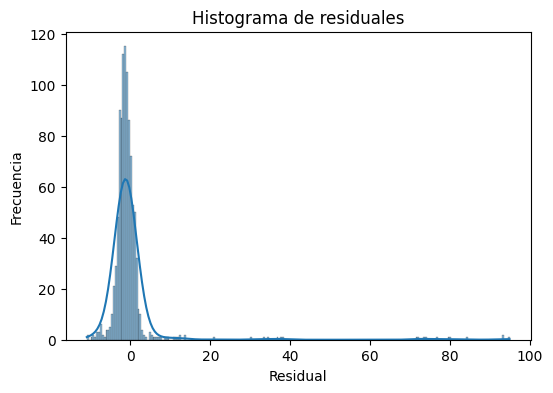

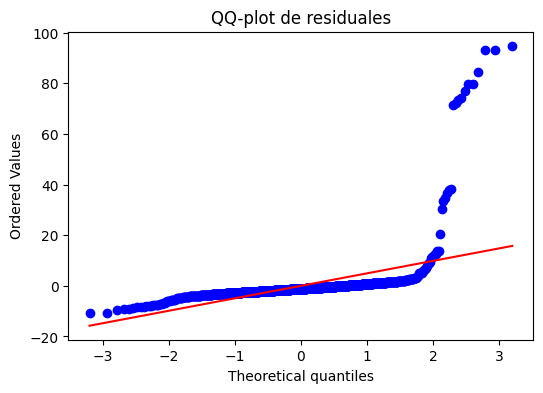

In [ ]:
residuales = np.array(y_train - y_train_pred)
estat, p_shapiro = shapiro(residuales)
print("Shapiro-Wilk p-value:", p_shapiro)

# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 2. QQ-plot
plt.figure(figsize=(6, 4))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("QQ-plot de residuales")
plt.show()

Acá hay varias problemáticas, pues el p value es muy pequeño, el QQ plot los valores se alejan mucho de lo esperado(línea recta). Adicionalmente los residuales están más o menos centrados en cero, pero hay una cola muy larga hacia los valores positivos. Todos estos factores indican que los errores no siguen una distribución normal.

## Homecedasticidad

In [ ]:
X_num = Xt_train_df.select_dtypes(include="number").copy()
mask = np.isfinite(X_num).all(axis=1)
X_num_clean = X_num[mask]
resid_clean = residuales[mask]
X_num_const = sm.add_constant(X_num_clean)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(resid_clean, X_num_const)

print("Estadístico Breusch-Pagan:", bp_stat)
print("p-value Breusch-Pagan   :", bp_pvalue)

Estadístico Breusch-Pagan: 15.990098303511852
p-value Breusch-Pagan   : 0.5245369815637966


Esto significa que desde el punto de vista estadístico no hay suficiente evidencia como para rechazar que los errores no sean constantes, ya que el p-value es mayor a 0.5. Por lo tanto se cumple el supuesto de Homecedasticidad.

## Planteamiento de un segundo modelo

En este nuevo modelo se trata de hacer cumplir los supuestos de la regresión lineal removiendo las variables con alto resultado de multicolinealidad y variables que no deberían afectar la posibilidad del riesgo de CVD, tal como el sexo. Adicionalmente, la variable de la concentración de azucar en la sangre es redundate con la variable del estado de la diabetes.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)
cols_to_drop2 = ["Patient ID", "Date of Service",
                 "Blood Pressure (mmHg)", "Height (cm)", "Height (m)", "Weight (kg)", "Abdominal Circumference (cm)",
                 "Sex", "CVD Risk Level", "Blood Pressure Category"]
def drop_columns2(df):
    return df.drop(columns=cols_to_drop2, errors="ignore")

dropper2 = FunctionTransformer(drop_columns2)

numeric_features2 = ["Waist-to-Height Ratio", 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)',
                    'Systolic BP', 'Diastolic BP', 'BMI','Age']
categorical_features2 = ['Diabetes Status', 'Smoking Status', 'Family History of CVD',"Physical Activity Level"]
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features2),
        ("cat", categorical_transformer, categorical_features2),
    ]
)

In [ ]:
pipeline_regresion2 = Pipeline(steps=[
    ("convert_age", convert_age),
    ("impute_sys_dia", impute_sys_dia),
    ("fill_measures", fill_measures),
    ("binary_converter", binary_converter),
    ("ordinal_converter", ordinal_converter),
    ("dropper", dropper2),
    ("preprocesamiento", preprocessor2),
])

In [ ]:
# Se ejecuta la preparación de los datos para la regresión lineal
Xt_train2 = pipeline_regresion2.fit_transform(X_train2)
# Hacemos la regresión
Modelo2 = LinearRegression()
Modelo2.fit(Xt_train2,y_train2)
y_train_pred2 = Modelo2.predict(Xt_train2)

In [ ]:
# Se calculan las métricas sobre el conjunto de entrenamiento
mae_train2 = mean_absolute_error(y_train2, y_train_pred2)
print("MAE  train:", mae_train2)
mse_train2 = mean_squared_error(y_train2, y_train_pred2)
rmse_train2 = np.sqrt(mse_train2)
print("RMSE train:", rmse_train2)
r2_train2 = r2_score(y_train2, y_train_pred2)
print("R²   train:", r2_train2)

MAE  train: 2.9227189915455276
RMSE train: 9.376260350587362
R²   train: 0.06476913828701103


In [ ]:
# Se calculan las métricas sobre el conjunto de validación
Xt_test2 = pipeline_regresion2.transform(X_test2)
y_test_pred2 = Modelo2.predict(Xt_test2)
mae_test2 = mean_absolute_error(y_test2, y_test_pred2)
rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
r2_test2 = r2_score(y_test2, y_test_pred2)
print("MAE  test:", mae_test2)
print("RMSE test:", rmse_test2)
print("R²   test:", r2_test2)

MAE  test: 3.3786997093533913
RMSE test: 12.203399251447294
R²   test: 0.02272230312069834


## Importancia de cada variable en el modelo:

In [ ]:
# Ahora veamos cómo el modelo estimó los coeficientes de cada variable independiente:
feature_names2 = pipeline_regresion2.named_steps["preprocesamiento"].get_feature_names_out()
feature_names2 = [
    name.replace("num__", "").replace("cat__", "")
    for name in feature_names2
]
coef_df2 = pd.DataFrame({
    "Variable": feature_names2,
    "Coeficiente": Modelo2.coef_
})
Xt_train_df2 = pd.DataFrame(
    Xt_train2.toarray() if hasattr(Xt_train2, "toarray") else Xt_train2,
    columns=feature_names2,
    index=X_train2.index
)
coef_df2

,Variable,Coeficiente
0,Waist-to-Height Ratio,-0.322170
1,HDL (mg/dL),0.133288
2,Fasting Blood Sugar (mg/dL),-0.033377
3,Systolic BP,0.955734
4,Diastolic BP,0.081386
5,BMI,1.451029
6,Age,-0.176650
7,Diabetes Status,3.211123
8,Smoking Status,0.408365
9,Family History of CVD,-0.227132


Como se puede observar en la tabla, el Diabetes Status y el BMI son los predictores con mayor peso en este modelo, lo que sugiere que, bajo esta configuración de regresión, son los factores que más drásticamente elevan la puntuación de riesgo calculada. Asimismo, que la Presión Arterial Sistólica sea un predictor fuerte es totalmente lógico, pues representa la fuerza que ejerce la sangre contra las arterias, siendo un indicador de hipertensión. Por el contrario, variables como el nivel de actividad física o el azúcar en sangre en ayunas muestran una influencia mucho menor en el resultado final del modelo actual.

Sin embargo, resulta equivocado que el azúcar en sangre tenga un impacto casi nulo o ligeramente negativo, pues sugiere que tener mayor concentración de azúcar en sangre disminuye el riesgo cardiovascular. También el hecho de que la historia familiar de CVD tenga un coeficiente negativo sugiere erróneamente que tener antecedentes familiares protege al paciente. Finalmente, un coeficiente negativo para la edad tampoco tiene sentido biológico, ya que el riesgo cardiovascular aumenta naturalmente con los años.

# Linealidad


In [ ]:
X_sm2 = sm.add_constant(Xt_train_df2)
modelo_sm2 = sm.OLS(y_train2, X_sm2).fit()

rainbow_stat2, rainbow_pvalue2 = linear_rainbow(modelo_sm2)

print("Estadístico Rainbow:", rainbow_stat2)
print("p-value Rainbow    :", rainbow_pvalue2)

Estadístico Rainbow: 1.9202186284292386
p-value Rainbow    : 2.733539983524747e-13


Nuevamente el p-value de Rainbow dió mucho menor a 0.5 por lo que hay suficiente evidencia estadística para rechazar el supuesto de linealidad.

# Multicolinealidad

In [ ]:
X_vif2 = Xt_train_df2.select_dtypes(include="number").copy()
clean_columns2 = (
    X_vif2.columns
         .str.replace("^num__", "", regex=True)
         .str.replace("^cat__", "", regex=True)
)
vif_values2 = []
with np.errstate(divide="ignore", invalid="ignore"):
    for i in range(X_vif2.shape[1]):
        vif2 = variance_inflation_factor(X_vif2.values, i)
        vif_values2.append(vif2)

vif_data2 = pd.DataFrame({
    "Variable": clean_columns2,
    "VIF": vif_values2
})
print(vif_data2)

                       Variable       VIF
0         Waist-to-Height Ratio  1.021296
1                   HDL (mg/dL)  1.010979
2   Fasting Blood Sugar (mg/dL)  1.016998
3                   Systolic BP  1.020863
4                  Diastolic BP  1.016173
5                           BMI  1.017307
6                           Age  1.026595
7               Diabetes Status  1.847878
8                Smoking Status  1.899253
9         Family History of CVD  1.830285
10      Physical Activity Level  2.982271


En este caso todas las variables tienen un $VIF<4$ que sugiere que no hay multicolinealidad entre las variables.

# Normalidad de los Errores

Shapiro-Wilk p-value: 8.410327603440764e-53


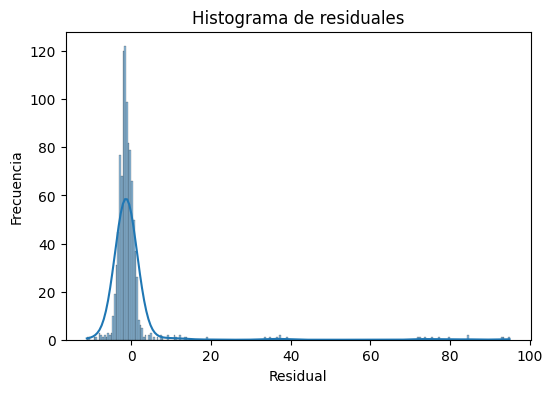

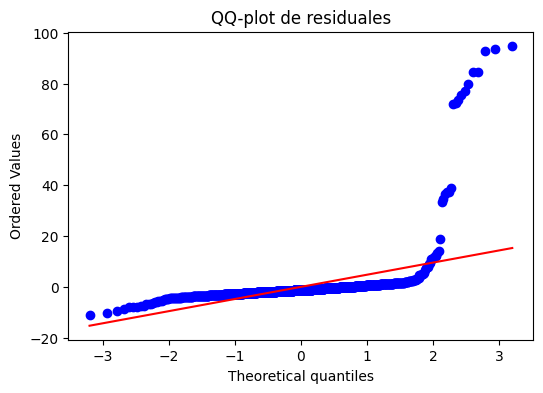

In [ ]:
residuales2 = np.array(y_train2 - y_train_pred2)
estat2, p_shapiro2 = shapiro(residuales2)
print("Shapiro-Wilk p-value:", p_shapiro2)

# Histograma
plt.figure(figsize=(6, 4))
sns.histplot(residuales2, kde=True)
plt.title("Histograma de residuales")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# 2. QQ-plot
plt.figure(figsize=(6, 4))
stats.probplot(residuales2, dist="norm", plot=plt)
plt.title("QQ-plot de residuales")
plt.show()

Se presenta un resultado muy similar al modelo 1, por lo tanto las conclusiones son las mismas: los errores no siguen una distribución normal.

# Homocedesticidad

In [ ]:
X_num2 = Xt_train_df2.select_dtypes(include="number").copy()
mask2 = np.isfinite(X_num2).all(axis=1)
X_num_clean2 = X_num2[mask2]
resid_clean2 = residuales2[mask2]
X_num_const2 = sm.add_constant(X_num_clean2)
bp_stat2, bp_pvalue2, _, _ = het_breuschpagan(resid_clean2, X_num_const2)

print("Estadístico Breusch-Pagan:", bp_stat2)
print("p-value Breusch-Pagan   :", bp_pvalue2)

Estadístico Breusch-Pagan: 8.366012194457825
p-value Breusch-Pagan   : 0.6801901308769075


En este caso debido a que el p-value es mayor a 0.6 no hay suficiente evidencia estadística para rechazar el supuesto de que el error entre las variables es el mismo. Al igual que en el modelo 1 se cumple el supuesto de homocedesticidad.

# Comparación entre los dos modelos

Se realiza una tabla comparativa con las métricas de ambos modelos

In [ ]:
data_metrics = {
    "Métrica": ["RMSE", "MAE", "R2"],
    "Modelo 1 (Todas las variables)": [rmse_test, mae_test, r2_test],
    "Modelo 2 (Variables Seleccionadas)": [rmse_test2, mae_test2, r2_test2]
}
pd.DataFrame(data_metrics)


,Métrica,Modelo 1 (Todas las variables),Modelo 2 (Variables Seleccionadas)
0,RMSE,12.412672,12.203399
1,MAE,3.535987,3.378700
2,R2,-0.011083,0.022722


El primer modelo evidenció que incluir todas las variables disponibles no garantiza mayor precisión. La presencia de redundancias, como el uso simultáneo de BMI y relación cintura-estatura, generó inestabilidad en los coeficientes y una interpretación clínica contradictoria. Este fenómeno de multicolinealidad, sumado al ruido de variables poco informativas, resultó en un incoherencias que confirman que el exceso de datos puede oscurecer la relación real de los factores de riesgo.

En contraste, el segundo modelo demostró que la selección estratégica de variables mejora la robustez y generalización. Al conservar únicamente predictores independientes y significativos, como la presión sistólica, se logró reducir el error y aumentar el coeficiente $R^2$. Esta versión no solo es estadísticamente superior, sino que ofrece una explicación lógica del riesgo cardiovascular, resaltando que la calidad y la independencia de las características son fundamentales para construir modelos de regresión lineal confiables.

Sin embargo, hay coeficientes dentro del ajuste del segundo modelo que no siguen la intuición, tal como fue explicado anteriormente. Lo cual puede ser explicado con la falta de normalidad en la distribución de los errores y el p-value de Rainbow mucho menor a 0.5. Todas estas violanciones a los supuestos de la regresión linal sugiere que en realidad las variables independientes no siguen un comportamiento lineal con la variable a predecir.

# Análisis de Resultados

##¿Cuál fue el valor de los diferentes coeficientes obtenidos en el mejor modelo?

El Modelo 2 (con variables seleccionadas) fue seleccionado como el mejor modelo. Sus coeficientes obtenidos tras estandarizar las variables numéricas, son los siguientes:
| Variable | Coeficiente  |
|---|---|
| Diabetes Status | 3.2111 |
| BMI | 1.4510 |
| Systolic BP | 0.9557 |
| Smoking Status | 0.4084 |
| HDL (mg/dL) | 0.1333 |
| Diastolic BP | 0.0814 |
| Physical Activity Level | 0.0393 |
| Fasting Blood Sugar (mg/dL) | -0.0334 |
| Age | -0.1767 |
| Family History of CVD | -0.2271 |
| Waist-to-Height Ratio | -0.3222 |

El intercepto del modelo corresponde al valor medio predicho de CVD Risk Score cuando todas las variables estandarizadas valen cero (Cuando cada variable toma su valor promedio). Dado que las variables numéricas están estandarizadas cada coeficiente indica cuántas unidades cambia el CVD Risk Score por cada desviación estándar de incremento en esa variable.

**Lectura técnica:**
- Coeficiente positivo: incrementa el score predicho.
- Coeficiente negativo: reduce el score predicho.
- Magnitud alta: mayor contribución lineal (aunque no implica causalidad).




##A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?


El Modelo 2 ofrece un mejor rendimiento en las tres métricas evaluadas sobre el conjunto de test,  para RMSE, el modelo 2 obtuvo un RMSE de 12.20 frente a 12.41 del modelo 1. Este valor indica que en promedio las predicciones se desvían aproximadamente 12 unidades del valor real de CVD Risk Score. Al penalizar más los errores grandes (por la raíz cuadrada del error cuadrático), este valor revela que el modelo comete algunos errores considerables en ciertos pacientes. La diferencia notable entre el RMSE y el MAE sugiere la presencia de outliers o predicciones muy alejadas del valor real en algunos casos.

En cuanto a el MAE (Mean Absolute Error), el modelo 2 logró un MAE de 3.38 frente a 3.54 del modelo 1. Esto representa que el modelo se equivoca en aproximadamente 3.4 unidades. Esta métrica es más robusta a outliers que el RMSE. Pasando al R^2 (Coeficiente de determinación), el modelo 2 obtuvo un R^2 de 0.023, mientras que el modelo 1 obtuvo un R^2 negativo de -0.011. Un R^2 negativo significa que el modelo 1 predice peor que simplemente usar la media de los datos como predicción constante. El R^2 del modelo 2 es positivo pero es muy bajo, lo que indica que el modelo lineal solo explica aproximadamente el 2.3% de la variabilidad del CVD Risk Score. Esto confirma que la relación entre las variables predictoras y el score de riesgo no es predominantemente lineal, como también lo confirmó el test de Rainbow.

En resumen, aunque el modelo 2 es superior al modelo 1, ambos tienen un rendimiento deficiente para predecir el CVD Risk Score. Esto se debe a que los supuestos de linealidad y normalidad de los errores no se cumplen, lo cual limita la capacidad del modelo de regresión lineal para capturar la relación real entre las variables y el riesgo cardiovascular.

##¿Cuáles variables fueron seleccionadas con el modelo seleccionado? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

Las variables seleccionadas en el modelo 2 fueron: Waist-to-Height Ratio, HDL (mg/dL), Fasting Blood Sugar (mg/dL), Systolic BP, Diastolic BP, BMI, Age, Diabetes Status, Smoking Status, Family History of CVD y Physical Activity Level.

Se eliminaron las variables con alta multicolinealidad (Height, Weight, Abdominal Circumference, las cuales son redundantes con BMI, Waist-to-Height Ratio y Blood Pressure), las variables sin poder predictivo demostrado (Sex, CVD Risk Level).

Basado en los resultados los predictores más significativos es `Diabetes Status`con un valor de 3.21, fue el predictor con mayor impacto. Esto representa que un paciente con diabetes tiene un CVD Risk Score 3.2 unidades más alto que uno sin diabetes, manteniendo las demás variables constantes.

EL `BMI` también nos da información relevante para la interpretación del caso. Por cada desviación estándar de aumento en el índice de masa corporal el riesgo aumenta en 1.45 veces. La obesidad es un factor de riesgo cardiovascular bien establecido, ya que incrementa la carga de trabajo del corazón.

La sistolica también fue un indicador claro en nuestro caso de AlpesHearth, con un coeficiente de 0.96 (El tercero más alto). La hipertensión fuerza al corazón a bombear con mayor esfuerzo deteriorando progresivamente las arterias.

##A partir del contexto y los datos compartidos, ¿cómo representar la regresión lineal de forma matemática? Indique el método utilizado y el proceso para resolverlo.


En este laboratorio modelamos el CVD Risk Score mediante regresión lineal múltiple. El modelo se expresa como:

\[ y= beta_0 + beta_1 x_1 + beta_2 x_2 + ... + beta_n x_n
\]

En nuestro caso seria:
- y es la predicción del CVD Risk Score
- ( x_1, ... , x_n \) son las variables predictoras (imputación, escalado y codificación)
- ( beta_0 ) es el intercepto,
- (beta_1, ..., beta_n ) son los coeficientes del modelo.

En scikit-learn, LinearRegression() resuelve este problema numéricamente usando álgebra lineal sin que tengamos que calcular la inversa explícitamente. Pero nuestro proceso para llegar al uso de la regresion lineal y su resolucion fue algo asi.
1. Definición de variables: se separó el target (CVD Risk Score) del conjunto de predictores (X).
2. División train/test: se aplicó `test_size=0.25` y `random_state=42` como indica el enunciado.
3. Preprocesamiento dentro de pipeline:
   - imputación de faltantes (ajustada solo con train)
   - escalado de numéricas
   - codificación de categóricas (binarias/ordinales/one-hot según el caso).
4. Entrenamiento: ajuste de (beta) usando el conjunto de entrenamiento.
5. Evaluación: predicción en test y cálculo de RMSE, MAE y R^2.
6. Interpretación: análisis de coeficientes del mejor modelo y validación de supuestos (linealidad, normalidad, homocedasticidad, multicolinealidad).

##En el ciclo de machine learning ¿Qué tipos de sesgo podría afectar los resultados y por qué? Describe dos tipos de sesgo.

### Sesgo de selección
Este sesgo ocurre cuando la muestra de datos no es representativa de la población objetivo. En nuestro caso, AlpesHearth busca calcular el riesgo cardiovascular de la población general, pero los datos provienen de pacientes que ya acudieron a un servicio médico. Esto significa que personas jóvenes y aparentemente sanas probablemente están subrepresentadas en el dataset, ya que tienden a no asistir a consultas médicas si no presentan síntomas. Como consecuencia el modelo podría sobreestimar el riesgo promedio de la población general y tener menor precisión para predecir el riesgo en adultos jóvenes, que es precisamente el grupo de interés para las campañas preventivas de AlpesHearth.

### Sesgo de medición
Este sesgo se presenta cuando los datos recolectados contienen errores sistemáticos en su medición o registro. En nuestro dataset identificamos evidencia de este sesgo ya que existían valores negativos en el CVD Risk Score, en el colesterol total y en la lipoproteína LDL, lo cual es biológicamente imposible. Aunque se corrigieron tomando el valor absoluto, esto introduce una suposición que puede no reflejar el error real de captura. Adicionalmente, se encontraron 302 registros duplicados y pacientes con el mismo ID y fecha pero diferente CVD Risk Score, lo que sugiere inconsistencias en el proceso de registro de los datos. Estos problemas de calidad en la medición pueden generar ruido en el modelo y distorsionar los coeficientes estimados, afectando la capacidad predictiva del modelo resultante.






# Predicciones

In [ ]:
testdf = pd.read_csv("data/Datos Test Lab 1.csv",sep=";")
X_testf = testdf.copy()
Xt_testf = pipeline_regresion2.transform(X_testf)
y_test_predf = np.round(Modelo2.predict(Xt_testf),3)

In [ ]:
pred ={"CVD Risk Score": y_test_predf}
pred_df = pd.DataFrame(pred)
display(pred_df)
pred_df.to_csv("Predicciones Test Lab 1.csv")

,CVD Risk Score
0,20.561
1,18.641
2,17.184
3,14.414
4,13.369
...,...
189,22.228
190,18.109
191,17.220
192,17.637


##Declaración de Uso de IAG


## 1) Declaración del uso

**Herramientas utilizadas:**  
- Nombre: ChatGPT (OpenAI)  
- Versión: Plus

###Prompt utlizados:

  - Generación inicial de código


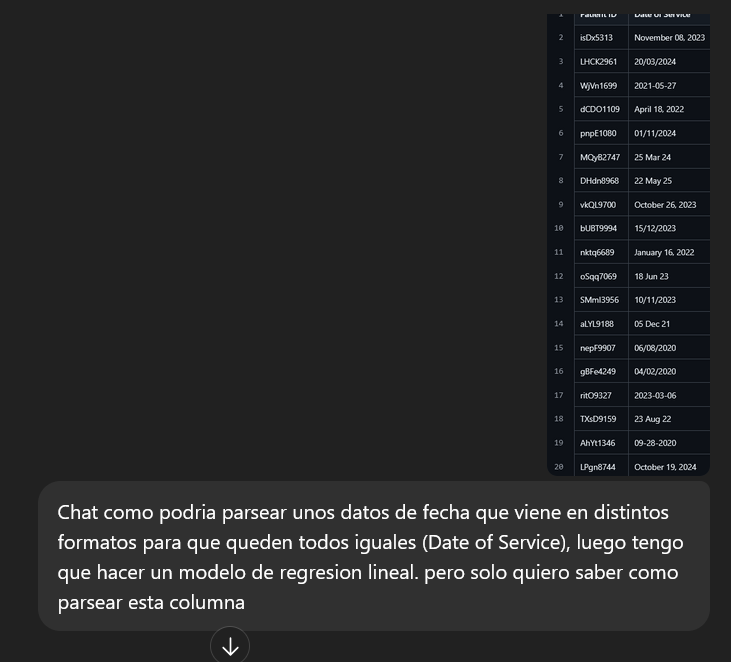


Mediante ChatGPT le pedimos una manera para poder hacer la limpieza de datos, donde vimos necesario parsear las fechas ya que venian en formatos distintos y pensamos que podria ser problematico.

Respuesta obtenida:
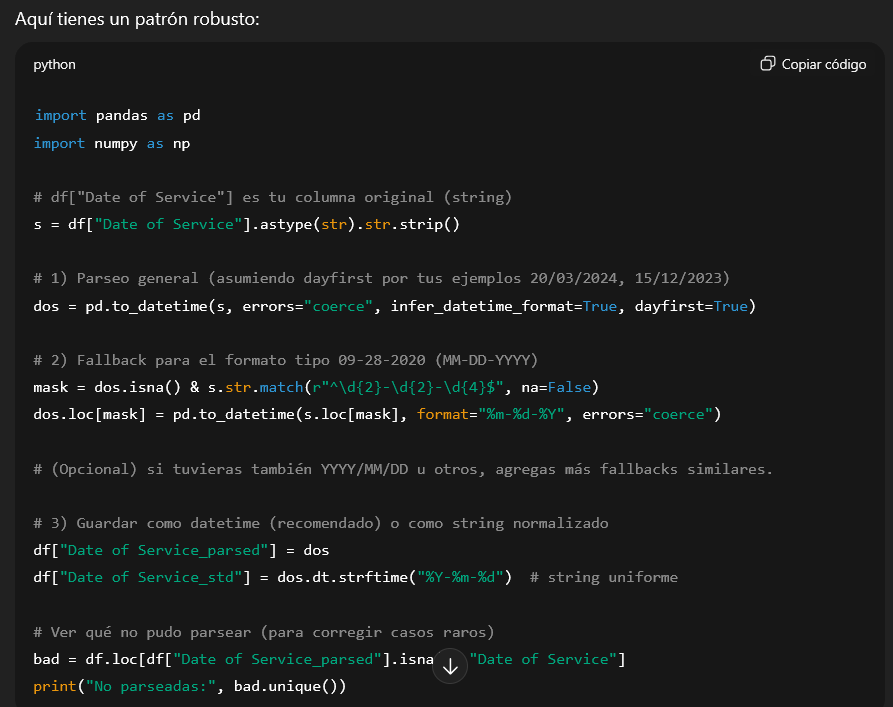

Aca nos dio una solución para el parseo, con esto no copiamos directamente el código si no que usamos la idea para adaptarlo y escribir lo que fue nuestro fragmento. De las partes que nos dieron todo el fragmento en si está bien y puede llegar a ser usado en nuestro contexto, sin embargo, la decisión de simplificar el código dado fue por el hecho de hacer nuestra propia solución.

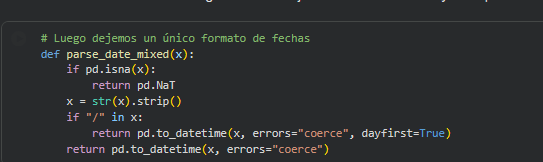

Finalmente esto fue lo que decidimos implementar para nuestro parseo, el objetivo de la consulta fue buscar como simplificar el proceso de EDA.


-Sugerencia de como llevar acabo el segundo modelo.

Prompt usado:

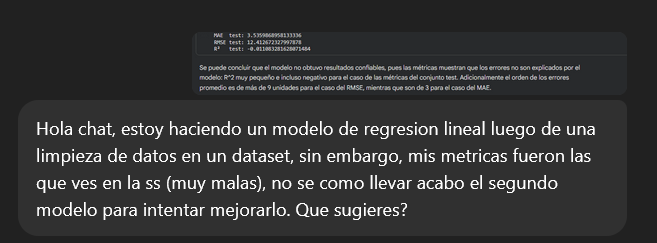

Basado en las metricas que se veian muy mal decidimos ver que sugerencia nos daba, (hay un mensaje intermedio en el que se le muestra la estructura del dataset luego de la limpieza para que tuviera algo de contexto y su respuesta fuera más precisa para nuestro caso)
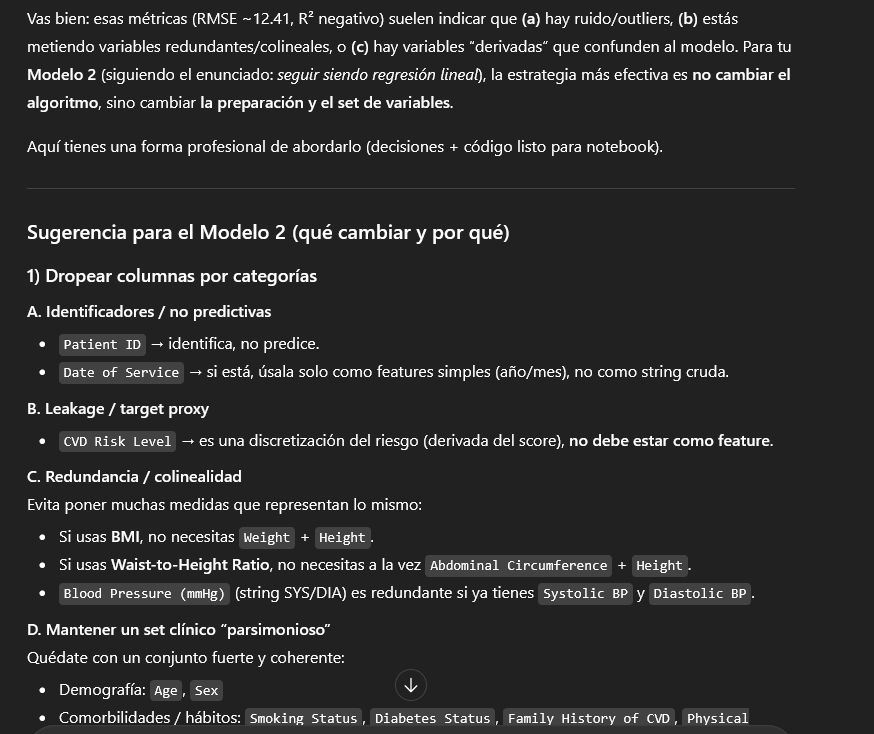

Acá se ve parte de la respuesta que nos dio ChatGPT, gran parte de lo que nos dice fue bastante útil para como quisimos abordar el segundo modelo, donde decidimos dropear columnas que pueden dañar la predicción, sin embargo, si hubo una recomendación que decidimos saltarnos que era agregar variables usando algunas que ya teniamos.

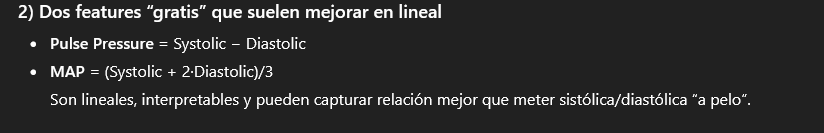


Como lo aplicamos nosotros:


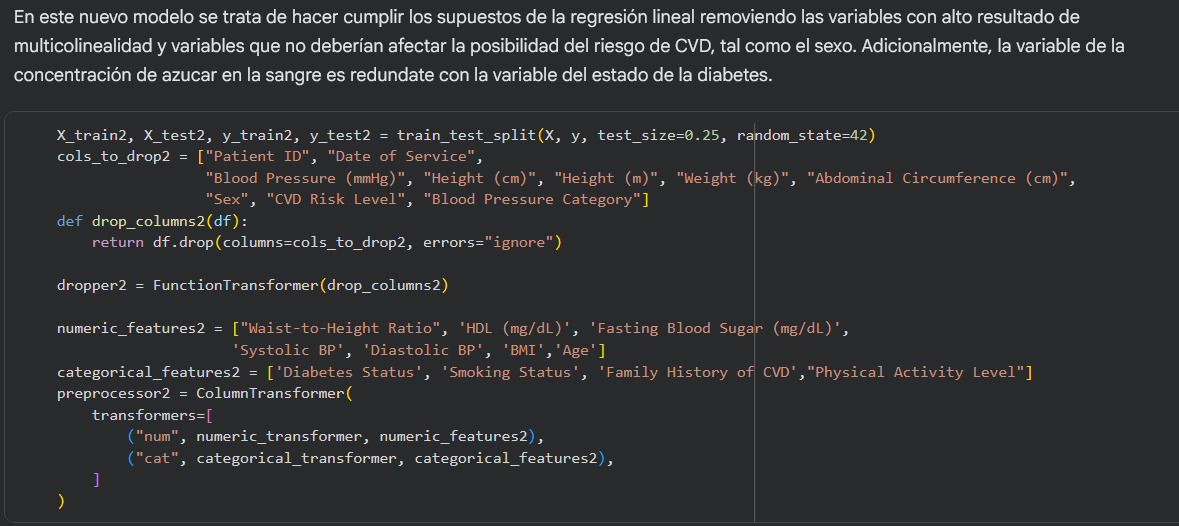

Acá vemos que aplicamos ciertas de las recomendaciones, sin embargo, pudimos concluir que la sugerencia o los datos no pueden mejorar mucho más las metricas. Esto ya que aunque la estrategia de selección mejoró las métricas el R² se mantuvo bajo. Esto sugiere que el CVD Risk Score puede depender de relaciones no lineales o ruido de medición. Es una limitación propia del dataset y de la regresión lineal. Entonces nuestra preocupación dada por los malos resultados que nos llevo a usar ChatGPT fue buena pero no ideal.
